# Suicides in India Data Analysis

## Impoting required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset Source

- The dataset used in this Capstone EDA project is a real-world dataset. It was compiled by us using the data which was provided by the **National Crime Records Bureau**.
- https://www.ncrb.gov.in/accidental-deaths-suicides-in-india-adsi.html

## Impoting the Dataset

**Suicides in India dataset from 2010 to 2022**

In [2]:
df=pd.read_csv("Suicides_in_India_2010_2022.csv")

In [3]:
df

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Percentage share according to state,Projected Mid-Year Population (in lakhs)
0,2010,Andhra Pradesh,4739,2031,677,4739,1354,6770,4.95,530.3
1,2010,Arunachal Pradesh,79,34,11,79,23,113,-0.15,15.5
2,2010,Assam,1766,757,252,1766,505,2523,1.75,354.9
3,2010,Bihar,373,160,53,373,107,533,0.15,1255.3
4,2010,Chhattisgarh,4492,1926,641,4492,1285,6418,4.65,299.5
...,...,...,...,...,...,...,...,...,...,...
463,2022,Delhi (UT),2391,1026,341,2391,685,3417,1.75,211.0
464,2022,Jammu & Kashmir,296,127,42,296,85,423,-0.05,135.4
465,2022,Ladakh,9,4,1,9,3,13,-0.25,3.0
466,2022,Lakshadweep,2,1,0,2,1,3,-0.25,0.7


## Dataset Description

**The overview of the dataset is as follows:**

**Year**: Year of data recording (2010–2022).<br>
**States**: Indian state or region.<br>
**Male**: Number of male suicides.<br>
**Female**: Number of female suicides.<br>
**Children (0-18)**: Number of suicides in the 0-18 age range.<br>
**Adults (18-45)**: Number of suicides in the 18-45 age range.<br>
**Old Age (45+)**: Number of suicides in the 45+ age range.<br>
**No. of suicides**: Total suicides recorded.<br>
**Percentage share according to state**: Percentage share of suicides in each state.<br>
**Projected Mid-Year Population (in lakhs)**: Projected mid-year population for the state.<br>

- The suicide data is categorized based on **demography**, based on **gender** and based on different **age groups**.

In [4]:
#Shape of teh dataframe created
df.shape

(468, 10)

- The above code gives us th shape i.e the **no. of rows and columns** of the dataframe.
- It is given in teh form of a tuple (rows, columns).
- We have **468 rows and 10 columns**. 

In [5]:
#Getting Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      468 non-null    int64  
 1   States                                    468 non-null    object 
 2   Male                                      468 non-null    int64  
 3   Female                                    468 non-null    int64  
 4   Children (0-18)                           468 non-null    int64  
 5   Adults (18-45)                            468 non-null    int64  
 6   Old Age (45+)                             468 non-null    int64  
 7   No. of suicides                           468 non-null    int64  
 8   Percentage share according to state       468 non-null    float64
 9   Projected Mid-Year Population (in lakhs)  468 non-null    float64
dtypes: float64(2), int64(7), object(1)
mem

- The dataset has a total of **10 columns** starting with index **0 to 9**.
- Each containing **468 entries** each ranging from **0 to 467**.
- It specifies the name, non-null(filled) count and data types for each column.
- We have 3 types data in our dataset namely **integer, float and object**.
    - **int64=7**<br>
    - **float64=2**<br>
    - **object=1**<br>
- The dateset takes up **36.7 KB** of Space in the system.

### Detailed Descrption of the DataFrame

In [6]:
#Description of the dataset
df.describe()

,Year,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Percentage share according to state,Projected Mid-Year Population (in lakhs)
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,2016.000000,2858.262821,1225.630342,407.985043,2858.262821,817.645299,4083.893162,2.694658,375.205556
std,3.745661,3620.660450,1551.715578,517.239980,3620.660450,1034.475741,5172.375990,3.425730,489.537866
min,2010.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,-0.250000,0.700000
25%,2013.000000,152.000000,65.750000,21.500000,152.000000,44.250000,217.750000,0.150000,17.175000
50%,2016.000000,864.000000,371.500000,123.000000,864.000000,248.500000,1235.500000,0.900000,190.150000
75%,2019.000000,5296.000000,2270.750000,756.500000,5296.000000,1514.250000,7566.750000,5.050000,566.250000
max,2022.000000,15922.000000,6824.000000,2274.000000,15922.000000,4550.000000,22746.000000,13.550000,2340.900000


- The above code provides the **statistics** for the dataset provided.
- It only provides the results for the **numeric columns** that is **integer and float** columns.
- We have the decription about **9 of the 10 columns** in our dataset.
- The only column which is not included is the **States** column which is an **object** column.

1. **Year:**
- Count: 468 entries, representing the entire dataset over the years.
- Range: The dataset spans from 2010 (minimum) to 2022 (maximum), suggesting that it captures data over a period of 13 years.
- Mean: The average year is 2016, meaning most of the data points fall around this period.
2. **Male Suicides:**
- Count: 468 entries.
- Min: 1 suicide recorded in the smallest state or year.
- Max: The highest recorded male suicides is 15,922.
- Mean: The average male suicides per year across states is 2,858.
- Std: A high standard deviation of 3,620, indicating significant variability in the number of male suicides across states.
3. **Female Suicides:**
- Count: 468 entries.
- Min: 0 suicides recorded in some smaller states or years.
- Max: The highest recorded female suicides is 6,824.
- Mean: The average female suicides per year across states is 2,273.
- Std: A standard deviation of 1,556, again showing variability across states.
4. **Children (0-18):**
- Count: 468 entries.
- Min: The smallest number of suicides in the children’s age group is 0.
- Max: The highest recorded number of suicides in the children’s age group is 1,709.
- Mean: The average number of suicides in the children’s age group is 407.
- Std: A standard deviation of 517, indicating some states have a disproportionately high number of child suicides compared to others.
5. **Adults (18-45):**
- Count: 468 entries.
- Min: The smallest number of suicides in the 18-45 age group is 1.
- Max: The highest recorded suicides in the 18-45 age group is 22,746.
- Mean: The average number of suicides in the 18-45 age group is 2,858.
- Std: The standard deviation of 3,620 suggests that the distribution of suicides in this age group is highly variable across states.
6. **Old Age (45+):**
- Count: 468 entries.
- Min: The smallest number of suicides in the 45+ age group is 1.
- Max: The highest recorded suicides in the 45+ age group is 4,550.
- Mean: The average number of suicides in this age group is 408.
- Std: The standard deviation of 1,034 indicates some states have notably high suicides in the 45+ age group.
7. **No. of Suicides:**
- Count: 468 entries.
- Min: The smallest number of suicides recorded is 2.
- Max: The highest number of suicides is 22,746.
- Mean: The average number of suicides across all states and years is 4,083.
- Std: The standard deviation of 5,172 suggests significant variation in total suicides across states.
8. **Percentage Share According to State:**
- Count: 468 entries.
- Min: The minimum value for this column is -0.25%, which could indicate missing or invalid data.
- Max: The maximum value is 13.55%, suggesting that some states account for a large portion of suicides in the country.
- Mean: The average share is 2.07%, meaning that on average, a state contributes around 2% to the total suicides in India each year.
9. **Projected Mid-Year Population (in lakhs):**
- Count: 468 entries.
- Min: The smallest recorded population is 0.7 lakh.
- Max: The largest recorded population is 2,340.9 lakh.
- Mean: The average projected population size is 375.2 lakh.
- Std: The standard deviation of 489.5 lakh shows a high level of variation, indicating some states have much larger populations than others.

### Finding Null Values

In [7]:
#Finding missing values
df.isnull().sum()

Year                                        0
States                                      0
Male                                        0
Female                                      0
Children (0-18)                             0
Adults (18-45)                              0
Old Age (45+)                               0
No. of suicides                             0
Percentage share according to state         0
Projected Mid-Year Population (in lakhs)    0
dtype: int64

- There are **no missing values** or null values in the dateset provided.

### Finding Unique Values in teh States Column

In [8]:
states=df['States'].unique().tolist()
states

['Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'A & N Islands',
 'Chandigarh',
 'D & N Haveli and Daman & Diu',
 'Delhi (UT)',
 'Jammu & Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Puducherry']

- The above code gives us the **unique values** in the States column that is the total number of regions in the dataframe.
- We have **28 States** and **8 Union Territories** included in out data.

### Finding Unique Values in the Year Column

In [9]:
years=df['Year'].unique().tolist()
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

- We have taken **13 years** of data from the source for this dataset.
- Beggining from **2010** untill the latest report in **2022**.

## Cleaning Dataset

- **Data cleaning of a dataset is a neccessary step in the EDA process.**
- **By doing so, we ensure that your dataset is ready for meaningful analysis and visualization.**
- **It is the process of identifying and correcting or removing errors, handling missing values, outliers and incorrect datatypes from a dataset.**

In [10]:
df

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Percentage share according to state,Projected Mid-Year Population (in lakhs)
0,2010,Andhra Pradesh,4739,2031,677,4739,1354,6770,4.95,530.3
1,2010,Arunachal Pradesh,79,34,11,79,23,113,-0.15,15.5
2,2010,Assam,1766,757,252,1766,505,2523,1.75,354.9
3,2010,Bihar,373,160,53,373,107,533,0.15,1255.3
4,2010,Chhattisgarh,4492,1926,641,4492,1285,6418,4.65,299.5
...,...,...,...,...,...,...,...,...,...,...
463,2022,Delhi (UT),2391,1026,341,2391,685,3417,1.75,211.0
464,2022,Jammu & Kashmir,296,127,42,296,85,423,-0.05,135.4
465,2022,Ladakh,9,4,1,9,3,13,-0.25,3.0
466,2022,Lakshadweep,2,1,0,2,1,3,-0.25,0.7


- There is **a useless column** in the dataset given. It is the **Percentage share according to state** column.
- Therefore, there is **a need to drop** the column.

### Duplicating dataframe to remove some random data entries

In [11]:
df1=df.copy()
df1

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Percentage share according to state,Projected Mid-Year Population (in lakhs)
0,2010,Andhra Pradesh,4739,2031,677,4739,1354,6770,4.95,530.3
1,2010,Arunachal Pradesh,79,34,11,79,23,113,-0.15,15.5
2,2010,Assam,1766,757,252,1766,505,2523,1.75,354.9
3,2010,Bihar,373,160,53,373,107,533,0.15,1255.3
4,2010,Chhattisgarh,4492,1926,641,4492,1285,6418,4.65,299.5
...,...,...,...,...,...,...,...,...,...,...
463,2022,Delhi (UT),2391,1026,341,2391,685,3417,1.75,211.0
464,2022,Jammu & Kashmir,296,127,42,296,85,423,-0.05,135.4
465,2022,Ladakh,9,4,1,9,3,13,-0.25,3.0
466,2022,Lakshadweep,2,1,0,2,1,3,-0.25,0.7


In [12]:
def introduce_missing_values(data, missing_fraction=0.10, random_state=42):
    np.random.seed(random_state)
    data_with_missing = data.copy()
    total_entries = data.size
    num_missing = int(total_entries * missing_fraction)

    all_indices = [(row, col) for row in range(data_with_missing.shape[0]) for col in range(data_with_missing.shape[1])]
    missing_indices = random.sample(all_indices, num_missing)

    for row, col in missing_indices:
        data_with_missing.iloc[row, col] = np.nan

    return data_with_missing

data_with_missing = introduce_missing_values(df1, missing_fraction=0.10)
data_with_missing.isnull().sum()

Year                                        41
States                                      38
Male                                        46
Female                                      56
Children (0-18)                             41
Adults (18-45)                              40
Old Age (45+)                               51
No. of suicides                             41
Percentage share according to state         57
Projected Mid-Year Population (in lakhs)    57
dtype: int64

- **As you can see, we have removed 10 percent of trh data from the duplicated dataframe.**
- **We have done so to implement the concept of Filling Missing Values.**
- **We will apply different methids to fill the missing values depending on the column data types.**

In [13]:
data_with_missing

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Percentage share according to state,Projected Mid-Year Population (in lakhs)
0,2010.0,Andhra Pradesh,4739.0,2031.0,677.0,4739.0,1354.0,6770.0,4.95,530.3
1,2010.0,Arunachal Pradesh,79.0,34.0,11.0,79.0,23.0,NaN,-0.15,15.5
2,2010.0,Assam,1766.0,757.0,252.0,1766.0,505.0,2523.0,1.75,354.9
3,2010.0,Bihar,373.0,160.0,53.0,373.0,107.0,533.0,0.15,NaN
4,2010.0,Chhattisgarh,NaN,1926.0,641.0,4492.0,1285.0,6418.0,4.65,299.5
...,...,...,...,...,...,...,...,...,...,...
463,2022.0,Delhi (UT),2391.0,1026.0,341.0,NaN,685.0,3417.0,1.75,211.0
464,2022.0,Jammu & Kashmir,296.0,127.0,NaN,296.0,NaN,423.0,-0.05,NaN
465,2022.0,Ladakh,9.0,4.0,1.0,9.0,3.0,13.0,NaN,3.0
466,2022.0,Lakshadweep,2.0,1.0,NaN,2.0,1.0,3.0,-0.25,0.7


### Filling Missing Values for Numerical Columns

In [14]:
numerical_cols = data_with_missing.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    data_with_missing[col].fillna(data_with_missing[col].mean(), inplace=True)

data_with_missing.isnull().sum()

Year                                         0
States                                      38
Male                                         0
Female                                       0
Children (0-18)                              0
Adults (18-45)                               0
Old Age (45+)                                0
No. of suicides                              0
Percentage share according to state          0
Projected Mid-Year Population (in lakhs)     0
dtype: int64

- **As we can see, all teh missing values of the numerical type have been filled.**
- **We used the concept of MEAN for filling teh missing values in teh numerical colums.**
- **It is one of the most common ways of doing so.**
- **Only the States Column remains with missing values as it a categorical column.**

### Filling Missing Values for Categorical Columns

In [15]:
categorical_cols = data_with_missing.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data_with_missing[col].fillna(data_with_missing[col].mode()[0], inplace=True)



In [16]:
data_with_missing.isnull().sum()

Year                                        0
States                                      0
Male                                        0
Female                                      0
Children (0-18)                             0
Adults (18-45)                              0
Old Age (45+)                               0
No. of suicides                             0
Percentage share according to state         0
Projected Mid-Year Population (in lakhs)    0
dtype: int64

- **THe states column is the ony categorical column in teh dataset.**
- **Above, we have used the MODE concept for filling in the missing values for the States Column.**
- **Using MODE for filling categorical columns is one of the most basic ways of filling missing categorical values.**

### Continuation of the Data-Cleaning Process for the original DataFrame

In [17]:
df.drop(columns = ['Percentage share according to state'], inplace = True)

In [18]:
df

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs)
0,2010,Andhra Pradesh,4739,2031,677,4739,1354,6770,530.3
1,2010,Arunachal Pradesh,79,34,11,79,23,113,15.5
2,2010,Assam,1766,757,252,1766,505,2523,354.9
3,2010,Bihar,373,160,53,373,107,533,1255.3
4,2010,Chhattisgarh,4492,1926,641,4492,1285,6418,299.5
...,...,...,...,...,...,...,...,...,...
463,2022,Delhi (UT),2391,1026,341,2391,685,3417,211.0
464,2022,Jammu & Kashmir,296,127,42,296,85,423,135.4
465,2022,Ladakh,9,4,1,9,3,13,3.0
466,2022,Lakshadweep,2,1,0,2,1,3,0.7


- The column **Percentage share according to state** is dropped.
- It will be of **no help in the data visualization**.

In [19]:
df.dtypes

Year                                          int64
States                                       object
Male                                          int64
Female                                        int64
Children (0-18)                               int64
Adults (18-45)                                int64
Old Age (45+)                                 int64
No. of suicides                               int64
Projected Mid-Year Population (in lakhs)    float64
dtype: object

- The datatypes for each of the columns are **correct**.
- There is **no need to change** the datatype of any of the columns.

In [20]:
df.isnull().sum()

Year                                        0
States                                      0
Male                                        0
Female                                      0
Children (0-18)                             0
Adults (18-45)                              0
Old Age (45+)                               0
No. of suicides                             0
Projected Mid-Year Population (in lakhs)    0
dtype: int64

- There are **no missing values** in the dataset.
- This is mainly due to the fact that this dataset was compiled using the data provied by the **N.C.R.B.**

In [21]:
#Code to find the duplicated values in each row using a for loop
for column in df.columns:
    duplicates = df[df.duplicated(column)]
    print(f"Duplicate rows in {column}:")
    print()
    print(duplicates)
    print()
    print()

Duplicate rows in Year:

     Year             States  Male  Female  Children (0-18)  Adults (18-45)  \
1    2010  Arunachal Pradesh    79      34               11              79   
2    2010              Assam  1766     757              252            1766   
3    2010              Bihar   373     160               53             373   
4    2010       Chhattisgarh  4492    1926              641            4492   
5    2010                Goa   160      69               22             160   
..    ...                ...   ...     ...              ...             ...   
463  2022         Delhi (UT)  2391    1026              341            2391   
464  2022    Jammu & Kashmir   296     127               42             296   
465  2022             Ladakh     9       4                1               9   
466  2022        Lakshadweep     2       1                0               2   
467  2022         Puducherry   336     145               48             336   

     Old Age (45+)  No. of

- There are **many duplicated values** in each of the columns.
- But, we **cannot remove** them as they are **not false data entries.**

In [22]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs)


- As mentioned above, we have many duplicated values in each column. But, there are **no duplicated rows.**
- This means that **each row** is a **unique data entry**.

In [23]:
df.describe()

,Year,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs)
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,2016.000000,2858.262821,1225.630342,407.985043,2858.262821,817.645299,4083.893162,375.205556
std,3.745661,3620.660450,1551.715578,517.239980,3620.660450,1034.475741,5172.375990,489.537866
min,2010.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.700000
25%,2013.000000,152.000000,65.750000,21.500000,152.000000,44.250000,217.750000,17.175000
50%,2016.000000,864.000000,371.500000,123.000000,864.000000,248.500000,1235.500000,190.150000
75%,2019.000000,5296.000000,2270.750000,756.500000,5296.000000,1514.250000,7566.750000,566.250000
max,2022.000000,15922.000000,6824.000000,2274.000000,15922.000000,4550.000000,22746.000000,2340.900000


In [24]:
Q1= np.percentile(df['Male'], 25)
Q3= np.percentile(df['Male'], 75)
IQR= Q3-Q1
lower_bound= Q1- 1.5 * IQR
upper_bound= Q3+ 1.5 * IQR
outliers= df[(df['Male'] < lower_bound) | (df['Male'] > upper_bound)]
print(outliers[['Male']])
print()
outliers[['Male']].count()

      Male
121  13055
157  13374
193  13692
229  14011
265  14329
301  14648
337  14966
346  13050
373  15285
382  13328
409  15603
418  13605
445  15922
454  13883



Male    14
dtype: int64

- We have found out a total of **14 data entries** that **deviate** from the **normal trend** of the data.
- These are **not** actually the **outliers** but are the **excessive number of male suicides**.
- So, we don't consider them as outliers.
- We **wont't remove** them from our dataset.

In [25]:
Q1= np.percentile(df['Female'], 25)
Q3= np.percentile(df['Female'], 75)
IQR= Q3-Q1
lower_bound= Q1- 1.5 * IQR
upper_bound= Q3+ 1.5 * IQR
outliers= df[(df['Female'] < lower_bound) | (df['Female'] > upper_bound)]
print(outliers[['Female']])
print()
outliers[['Female']].count()

     Female
121    5596
157    5732
193    5869
229    6005
265    6142
301    6278
337    6415
346    5593
373    6551
382    5712
409    6688
418    5832
445    6824
454    5951



Female    14
dtype: int64

- We have found out a total of **14 data entries** that **deviate** from the **normal trend** of the data.
- These are **not** actually the **outliers** but are the **excessive number of female suicides**.
- So, we don't consider them as outliers.
- We **wont't remove** them from our dataset.

In [26]:
Q1= np.percentile(df['Children (0-18)'], 25)
Q3= np.percentile(df['Children (0-18)'], 75)
IQR= Q3-Q1
lower_bound= Q1- 1.5 * IQR
upper_bound= Q3+ 1.5 * IQR
outliers= df[(df['Children (0-18)'] < lower_bound) | (df['Children (0-18)'] > upper_bound)]
print(outliers[['Children (0-18)']])
print()
outliers[['Children (0-18)']].count()

     Children (0-18)
121             1865
157             1910
193             1956
229             2001
265             2047
301             2092
337             2138
346             1864
373             2183
382             1904
409             2229
418             1943
445             2274
454             1983



Children (0-18)    14
dtype: int64

- We have found out a total of **14 data entries** that **deviate** from the **normal trend** of the data.
- These are **not** actually the **outliers** but are the **excessive number of chidren suicides** between the **ages 0 to 18**.
- So, we don't consider them as outliers.
- We **wont't remove** them from our dataset.

In [27]:
Q1= np.percentile(df['Adults (18-45)'], 25)
Q3= np.percentile(df['Adults (18-45)'], 75)
IQR= Q3-Q1
lower_bound= Q1- 1.5 * IQR
upper_bound= Q3+ 1.5 * IQR
outliers= df[(df['Adults (18-45)'] < lower_bound) | (df['Adults (18-45)'] > upper_bound)]
print(outliers[['Adults (18-45)']])
print()
outliers[['Adults (18-45)']].count()

     Adults (18-45)
121           13055
157           13374
193           13692
229           14011
265           14329
301           14648
337           14966
346           13050
373           15285
382           13328
409           15603
418           13605
445           15922
454           13883



Adults (18-45)    14
dtype: int64

- We have found out a total of **14 data entries** that **deviate** from the **normal trend** of the data.
- These are **not** actually the **outliers** but are the **excessive number of adult suicides** between the **ages 18 to 45**.
- So, we don't consider them as outliers.
- We **wont't remove** them from our dataset.

In [28]:
Q1= np.percentile(df['Old Age (45+)'], 25)
Q3= np.percentile(df['Old Age (45+)'], 75)
IQR= Q3-Q1
lower_bound= Q1- 1.5 * IQR
upper_bound= Q3+ 1.5 * IQR
outliers= df[(df['Old Age (45+)'] < lower_bound) | (df['Old Age (45+)'] > upper_bound)]
print(outliers[['Old Age (45+)']])
print()
outliers[['Old Age (45+)']].count()

     Old Age (45+)
121           3731
157           3822
193           3913
229           4004
265           4095
301           4186
337           4277
346           3729
373           4368
382           3808
409           4459
418           3889
445           4550
454           3968



Old Age (45+)    14
dtype: int64

- We have found out a total of **14 data entries** that **deviate** from the **normal trend** of the data.
- These are **not** actually the **outliers** but are the **excessive number of elder suicides** above the **ages of 45**.
- So, we don't consider them as outliers.
- We **wont't remove** them from our dataset.

In [29]:
Q1= np.percentile(df['No. of suicides'], 25)
Q3= np.percentile(df['No. of suicides'], 75)
IQR= Q3-Q1
lower_bound= Q1- 1.5 * IQR
upper_bound= Q3+ 1.5 * IQR
outliers= df[(df['No. of suicides'] < lower_bound) | (df['No. of suicides'] > upper_bound)]
print(outliers[['No. of suicides']])
print()
outliers[['No. of suicides']].count()

     No. of suicides
121            18651
157            19106
193            19561
229            20016
265            20471
301            20926
337            21381
346            18643
373            21836
382            19040
409            22291
418            19437
445            22746
454            19834



No. of suicides    14
dtype: int64

- We have found out a total of **14 data entries** that **deviate** from the **normal trend** of the data.
- These are **not** actually the **outliers** but are the **excessive number of suicides** in general.
- So, we don't consider them as outliers.
- We **wont't remove** them from our dataset.

In [30]:
index_to_extract = [121, 157, 193, 229, 265, 301, 337, 346, 373, 382, 409, 418, 445, 454]
extracted_rows = df.loc[index_to_extract]
extracted_rows

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs)
121,2013,Maharashtra,13055,5596,1865,13055,3731,18651,1257.4
157,2014,Maharashtra,13374,5732,1910,13374,3822,19106,1257.4
193,2015,Maharashtra,13692,5869,1956,13692,3913,19561,1257.4
229,2016,Maharashtra,14011,6005,2001,14011,4004,20016,1257.4
265,2017,Maharashtra,14329,6142,2047,14329,4095,20471,1257.4
301,2018,Maharashtra,14648,6278,2092,14648,4186,20926,1257.4
337,2019,Maharashtra,14966,6415,2138,14966,4277,21381,1257.4
346,2019,Tamil Nadu,13050,5593,1864,13050,3729,18643,767.1
373,2020,Maharashtra,15285,6551,2183,15285,4368,21836,1257.4
382,2020,Tamil Nadu,13328,5712,1904,13328,3808,19040,767.1


- The **14 outliers** which we got for **each of the columns** were the **same in each case**.
- Therefore, we extracted the the outlier rows using the index number.
- As we can see, the outliers which are nothing but an **excessive number of suicides** are of mainly **Maharashtra & Tamil Nadu**.
- **10 rows are of Maharastra** whereas **4 are of Tamil Nadu**.
- This means these states have the **maximum number of suicides** in India.

## Visualization and Insights

- **Data visualization is essential for understanding the patterns and relationships in the dataset.**
- **It also helps in understanding the distribution of data.**
- **Assits in making descisions.**

In [31]:
df.head()

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs)
0,2010,Andhra Pradesh,4739,2031,677,4739,1354,6770,530.3
1,2010,Arunachal Pradesh,79,34,11,79,23,113,15.5
2,2010,Assam,1766,757,252,1766,505,2523,354.9
3,2010,Bihar,373,160,53,373,107,533,1255.3
4,2010,Chhattisgarh,4492,1926,641,4492,1285,6418,299.5


In [32]:
print("Max. male suicides in a year:",df['Male'].max())
print("Max. female suicides in a year:",df['Female'].max())
print("Max. no. of suicides in a year:",df['No. of suicides'].max())

Max. male suicides in a year: 15922
Max. female suicides in a year: 6824
Max. no. of suicides in a year: 22746


In [33]:
df[df['Male'] == 15922]

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs)
445,2022,Maharashtra,15922,6824,2274,15922,4550,22746,1257.4


- The **maximum number of male** who commited suicide was **15922**.
- It occurred in the state of **Maharashtra** in the year **2022**.

In [34]:
df[df['Female'] == 6824]

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs)
445,2022,Maharashtra,15922,6824,2274,15922,4550,22746,1257.4


- The **maximum number of female** who commited suicide was **6824**.
- It also occurred in the state of **Maharashtra** in the year **2022**.

In [35]:
df[df['No. of suicides'] == 22746]

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs)
445,2022,Maharashtra,15922,6824,2274,15922,4550,22746,1257.4


- The **maximum number of suicides** was **22746**.
- It also occurred in the state of **Maharashtra** in the year **2022**.

### Bar Plot 1

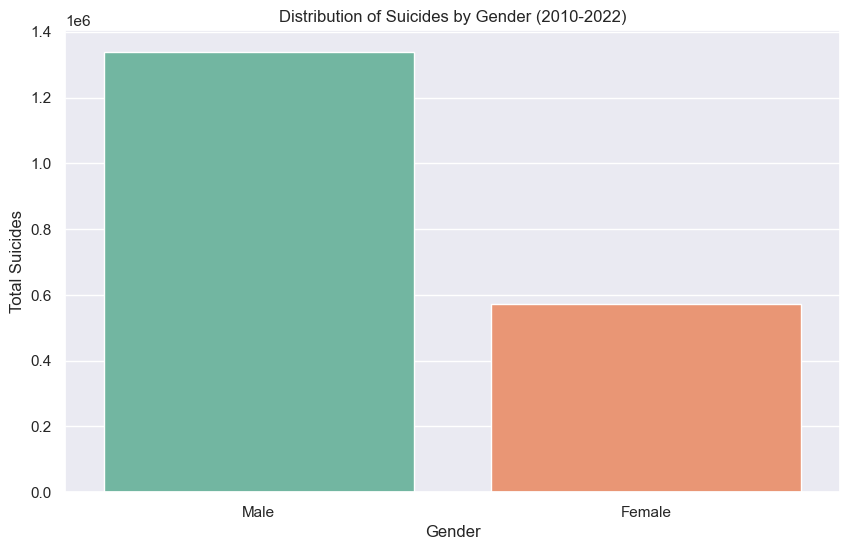

In [36]:
gender_suicides = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Total Suicides': [df['Male'].sum(), df['Female'].sum()]
})

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.barplot(data=gender_suicides, x='Gender', y='Total Suicides', palette='Set2')
plt.title('Distribution of Suicides by Gender (2010-2022)')
plt.xlabel('Gender')
plt.ylabel('Total Suicides')

plt.show()

### Line Plot 1

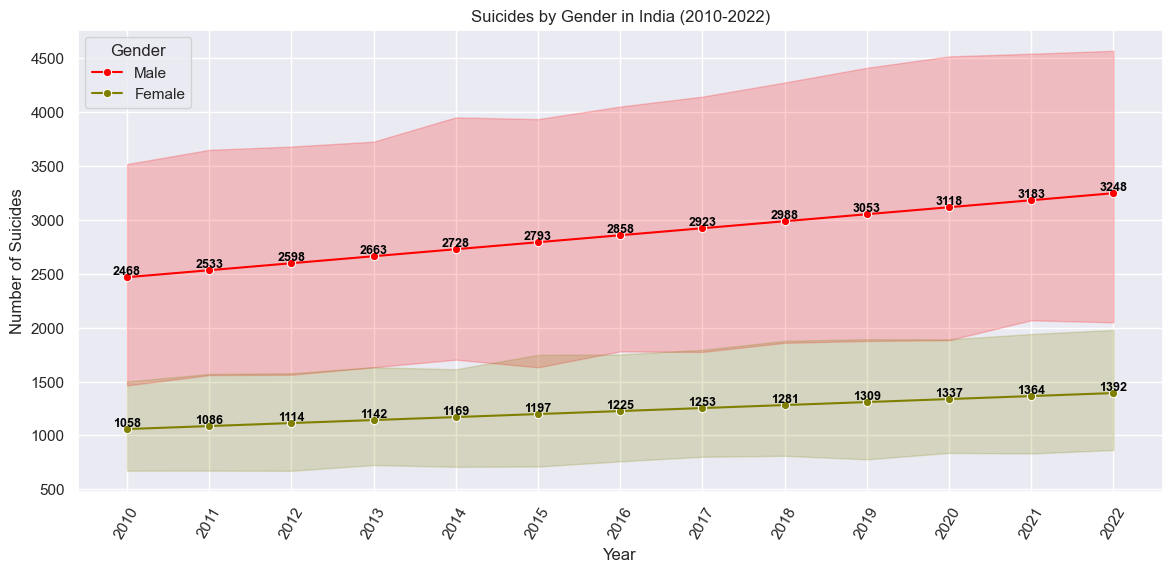

In [37]:
gender_data = df[['Year', 'Male', 'Female']].melt(id_vars='Year', var_name='Gender', value_name='Suicides')

plt.figure(figsize=(14, 6))
ax=sns.lineplot(data=gender_data, x='Year', y='Suicides', hue='Gender', marker='o', palette={'Male': 'red', 'Female': 'olive'})
plt.title('Suicides by Gender in India (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.xticks(gender_data['Year'].unique(), rotation=60)
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{int(y)}', color='black', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.legend(title='Gender')
plt.show()

- This graph reveals **gender disparities** in suicides that is the **difference in the number of male and female suicides**.
- The number of suicides **commited by the male population** is **higher** than that of the female population.

### Line Plot 2

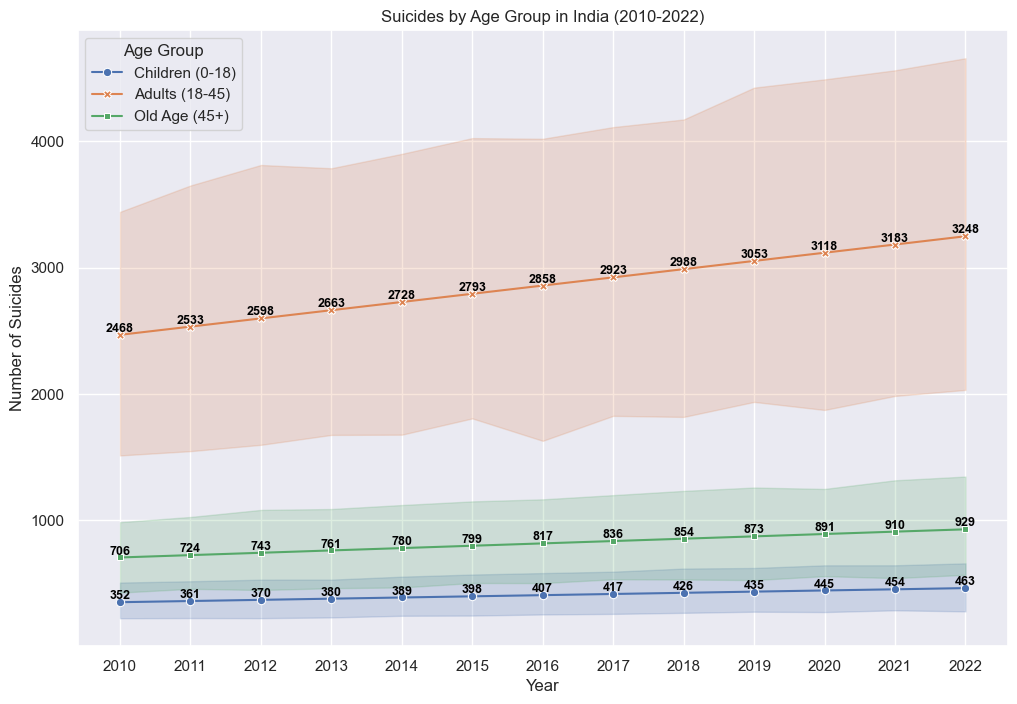

In [38]:
age_data = df[['Year', 'Children (0-18)', 'Adults (18-45)', 'Old Age (45+)']].melt(id_vars='Year', var_name='Age Group', value_name='Suicides')

plt.figure(figsize=(12, 8))
ax=sns.lineplot(data=age_data, x='Year', y='Suicides', hue='Age Group', style='Age Group', markers=True, dashes=False)
plt.title('Suicides by Age Group in India (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.xticks(age_data['Year'].unique())
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{int(y)}', color='black', ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.legend(title='Age Group')
plt.show()

- This helps us understand which **age groups are most affected the most**.
- We can highlight the age groups that are in more need of support.
- As we can see here, the **Adults (18-45)** have commited the **most number of suicides** and **Children (0-18) the least**.
- The **Elders (45+)** are also **less in numbers** as compared to the Adults. They are still more then Children.

### Bar Plot 2

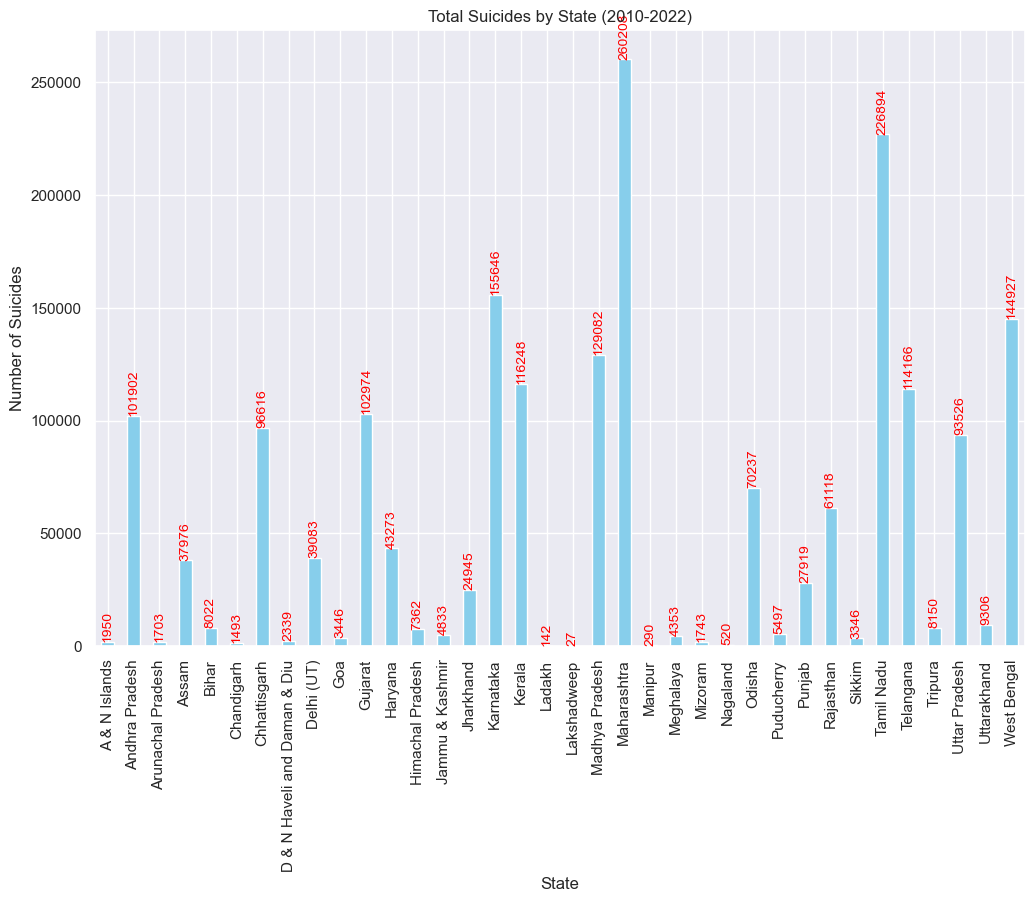

In [39]:
state_data = df.groupby('States')['No. of suicides'].sum()
plt.figure(figsize=(12, 8))
ax=state_data.plot(kind='bar', color='skyblue')
plt.title('Total Suicides by State (2010-2022)')
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90)
for i, v in enumerate(state_data):
    ax.text(i, v + 100, f'{v}', ha='center', va='bottom', fontsize=10, color='red', rotation=90)
plt.show()

- This visualization **highlights states and union territories with higher suicide counts**.
- **Maharashtra** is the state with the **highest suicide counts** in India with the total number being just above **2,60,000** between 2010-2020.
- The **least being Lakshadweep** mainly because it has very less population.

### Feature Engeneering 1

In [40]:
df['Suicide Rate per 100,000'] = (df['No. of suicides'] / (df['Projected Mid-Year Population (in lakhs)'] * 100000)) * 100
df.head()

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs),"Suicide Rate per 100,000"
0,2010,Andhra Pradesh,4739,2031,677,4739,1354,6770,530.3,0.012766
1,2010,Arunachal Pradesh,79,34,11,79,23,113,15.5,0.007290
2,2010,Assam,1766,757,252,1766,505,2523,354.9,0.007109
3,2010,Bihar,373,160,53,373,107,533,1255.3,0.000425
4,2010,Chhattisgarh,4492,1926,641,4492,1285,6418,299.5,0.021429


- **New column 'Suicide Rate per 100,000' added in the dataframe.**
- **It is equal to the number of suicides / Projected Mid-Year Population.**

### Bar Plot 3

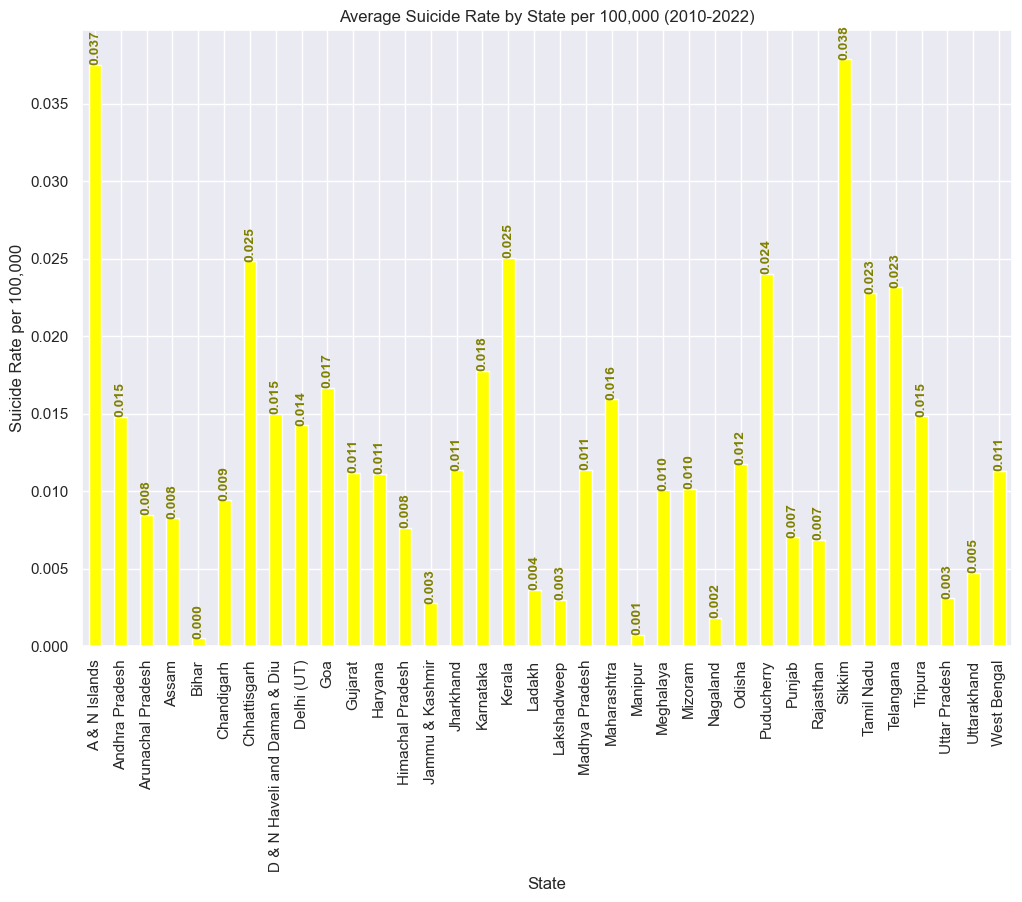

In [41]:
plt.figure(figsize=(12, 8))
state_rate_data = df.groupby('States')['Suicide Rate per 100,000'].mean()
ax=state_rate_data.plot(kind='bar', color='yellow',)
plt.title('Average Suicide Rate by State per 100,000 (2010-2022)')
plt.xlabel('State')
plt.ylabel('Suicide Rate per 100,000')
plt.xticks(rotation=90)
for i, v in enumerate(state_rate_data):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=10,fontweight='bold', color='olive', rotation=90)
plt.show()

- Here, it shows suicide rates adjusted for population size, offering a fair comparison across states.
- States such as **Kerela, Chhattisgarh, Puducherry, Tamil Nadu and Telangana** have a **higher average** as compared to the other states and UT's.
- The situation there should be handled more carefully.
- **Sikkim and Andaman & Nicobar Islands** have the **highest average** probably because of the **low population and higher suicide counts**.
- **Bihar, Ladakh, J&K, Uttar Pradesh** have the **lowest average**.

### Correlation Calculation b/w No. of Suicides and Population

In [42]:
population = df['Projected Mid-Year Population (in lakhs)']
suicides = df['No. of suicides']
population_mean = population.mean()
suicides_mean = suicides.mean()
correlation = sum((population - population_mean) * (suicides - suicides_mean)) / np.sqrt(sum((population - population_mean) ** 2) * sum((suicides - suicides_mean) ** 2))

print(f'Correlation between population and suicides: {correlation}')

Correlation between population and suicides: 0.6254942338644182


- A positive correlation suggests larger states experience more suicides, likely due to higher populations.
- Here the **correlation is positive** as well as **higher than 0.5**. So, states having **large populations** experience **higher suicides**.
- Also, maybe the population size itselft is influencing the suicides.

### Histogram 1

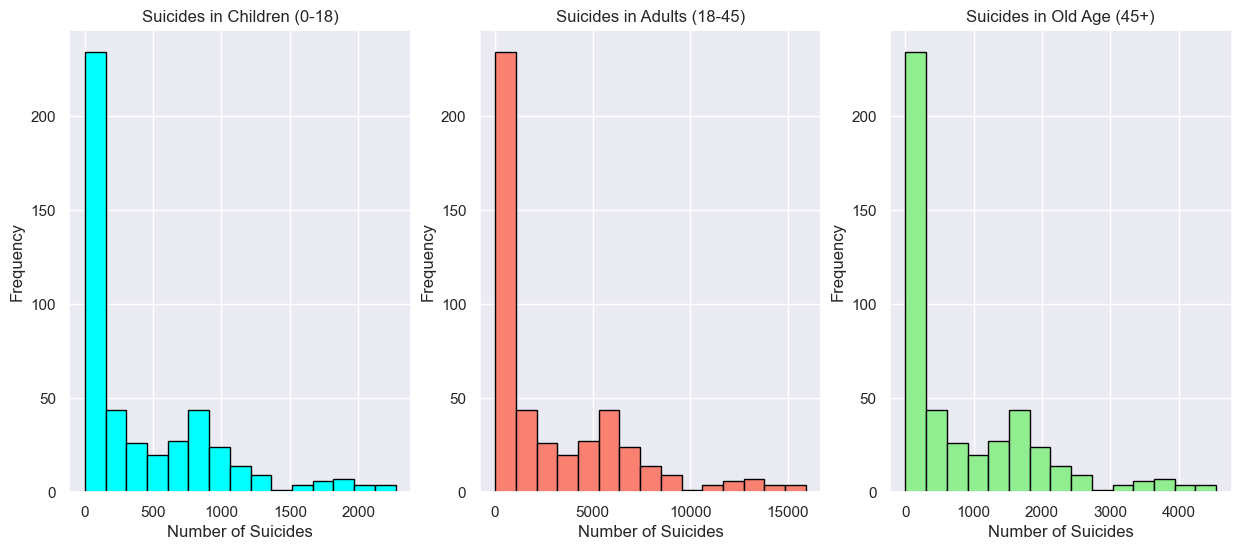

In [43]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(df['Children (0-18)'], bins=15, color='cyan', edgecolor='black')
plt.title('Suicides in Children (0-18)')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Adults (18-45)'], bins=15, color='salmon', edgecolor='black')
plt.title('Suicides in Adults (18-45)')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Old Age (45+)'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Suicides in Old Age (45+)')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')

plt.show()

- Histograms reveal the **distribution of suicides across age groups**.
- The **frequency** of suicides in **adults** appears to be **higher**, showing potential of age-specific risk.

### Histogram 2

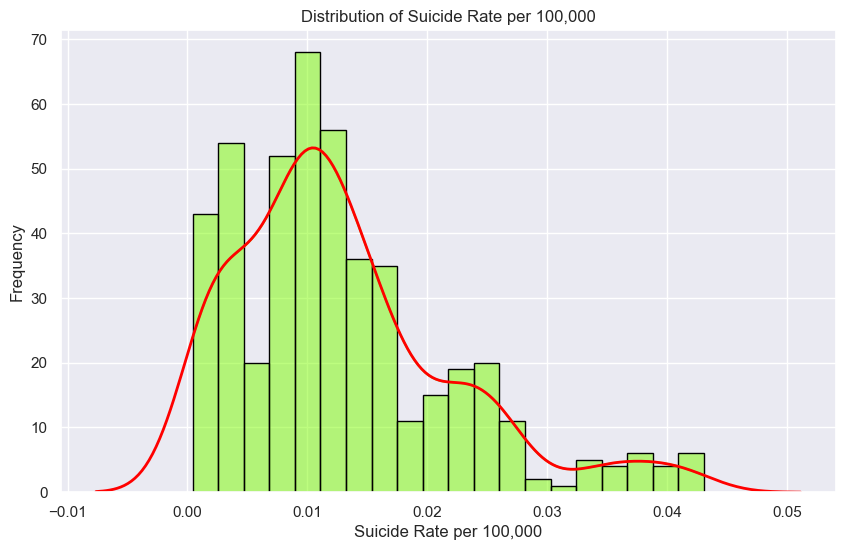

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Suicide Rate per 100,000'], bins=20, kde=True, color='lawngreen', edgecolor='black')
sns.kdeplot(df['Suicide Rate per 100,000'], color='red', linewidth=2)
plt.title('Distribution of Suicide Rate per 100,000')
plt.xlabel('Suicide Rate per 100,000')
plt.ylabel('Frequency')
plt.show()

- This plot shows the **distribution of suicide rates across states**.
- A **right-skewed distribution** may indicate that some states **have exceptionally high** suicide rates compared to others.
- This one is a **left-skewed distribution**.

### Box Plot 1

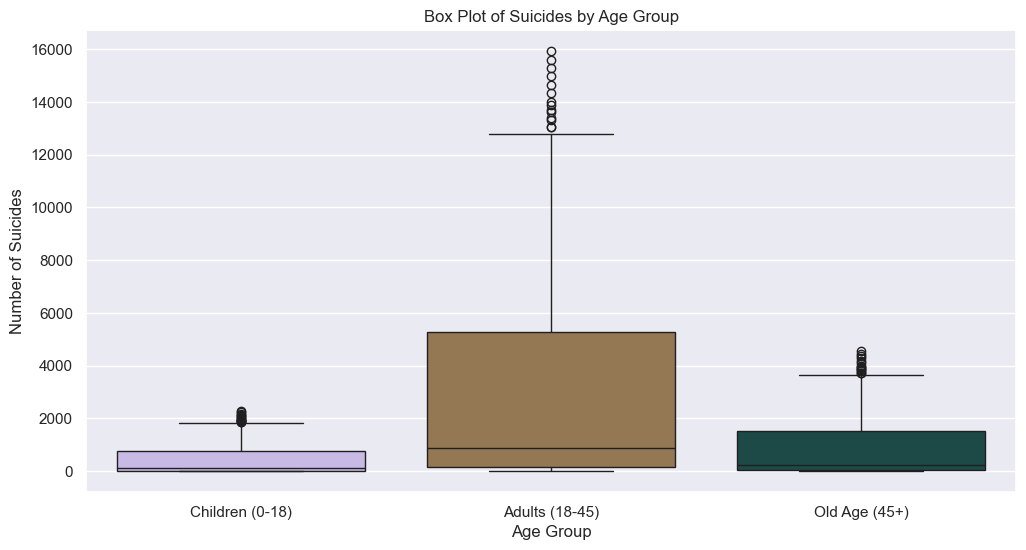

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Children (0-18)', 'Adults (18-45)', 'Old Age (45+)']], palette='cubehelix_r')
plt.title('Box Plot of Suicides by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')
plt.show()

- Box plots show the **spread and potential outliers** in suicide numbers for each age group.
- Any significant outliers indicates **exceptional cases** that is a **large number of suicides**.
- The **spread of data** in the **Adults** is **greater than** that of the **Children or Old** age groups.

### Pie Chart

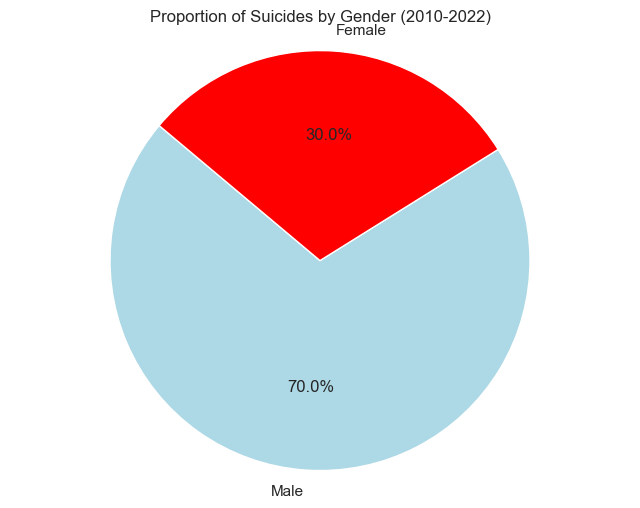

In [46]:
gender_suicides = df[['Male', 'Female']].sum()

plt.figure(figsize=(8, 6))
plt.pie(gender_suicides, labels=gender_suicides.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red'])
plt.title('Proportion of Suicides by Gender (2010-2022)')
plt.axis('equal')
plt.show()

- This pie chart highlights the **distribution of suicides** between **male** and **female** individuals.
- As we can see, the **male gender** have commited **more number of suicides** than the female gender. The ratio being **70:30**.
- A **higher proportion** of **male** suicides may point to many **socioeconomic problems** faced by men.

### Box Plot 2

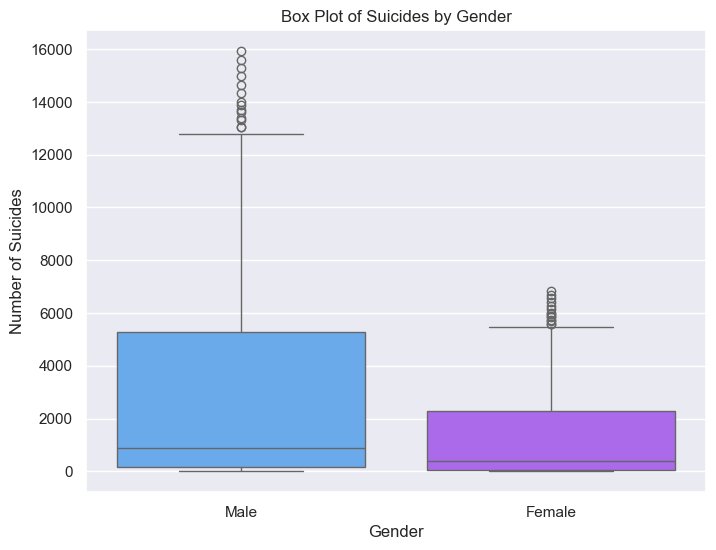

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Male', 'Female']],palette='cool')
plt.title('Box Plot of Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Suicides')

plt.show()

- Any significant outliers indicates exceptional cases that is a large number of suicides.
- The spread of data in the **Males** is **greater than** that of **Females**.

### Feature Engeneering 2

In [48]:
df['Male-to-Female Ratio'] = df['Male'] / df['Female']
df.head()

,Year,States,Male,Female,Children (0-18),Adults (18-45),Old Age (45+),No. of suicides,Projected Mid-Year Population (in lakhs),"Suicide Rate per 100,000",Male-to-Female Ratio
0,2010,Andhra Pradesh,4739,2031,677,4739,1354,6770,530.3,0.012766,2.333333
1,2010,Arunachal Pradesh,79,34,11,79,23,113,15.5,0.007290,2.323529
2,2010,Assam,1766,757,252,1766,505,2523,354.9,0.007109,2.332893
3,2010,Bihar,373,160,53,373,107,533,1255.3,0.000425,2.331250
4,2010,Chhattisgarh,4492,1926,641,4492,1285,6418,299.5,0.021429,2.332295


- **New column 'Male-to_Female Ratio' added in the dataframe.**
- **It is equal to the ratio of Male Suicides to Female Suicides for each year.**

### Scatter Plot

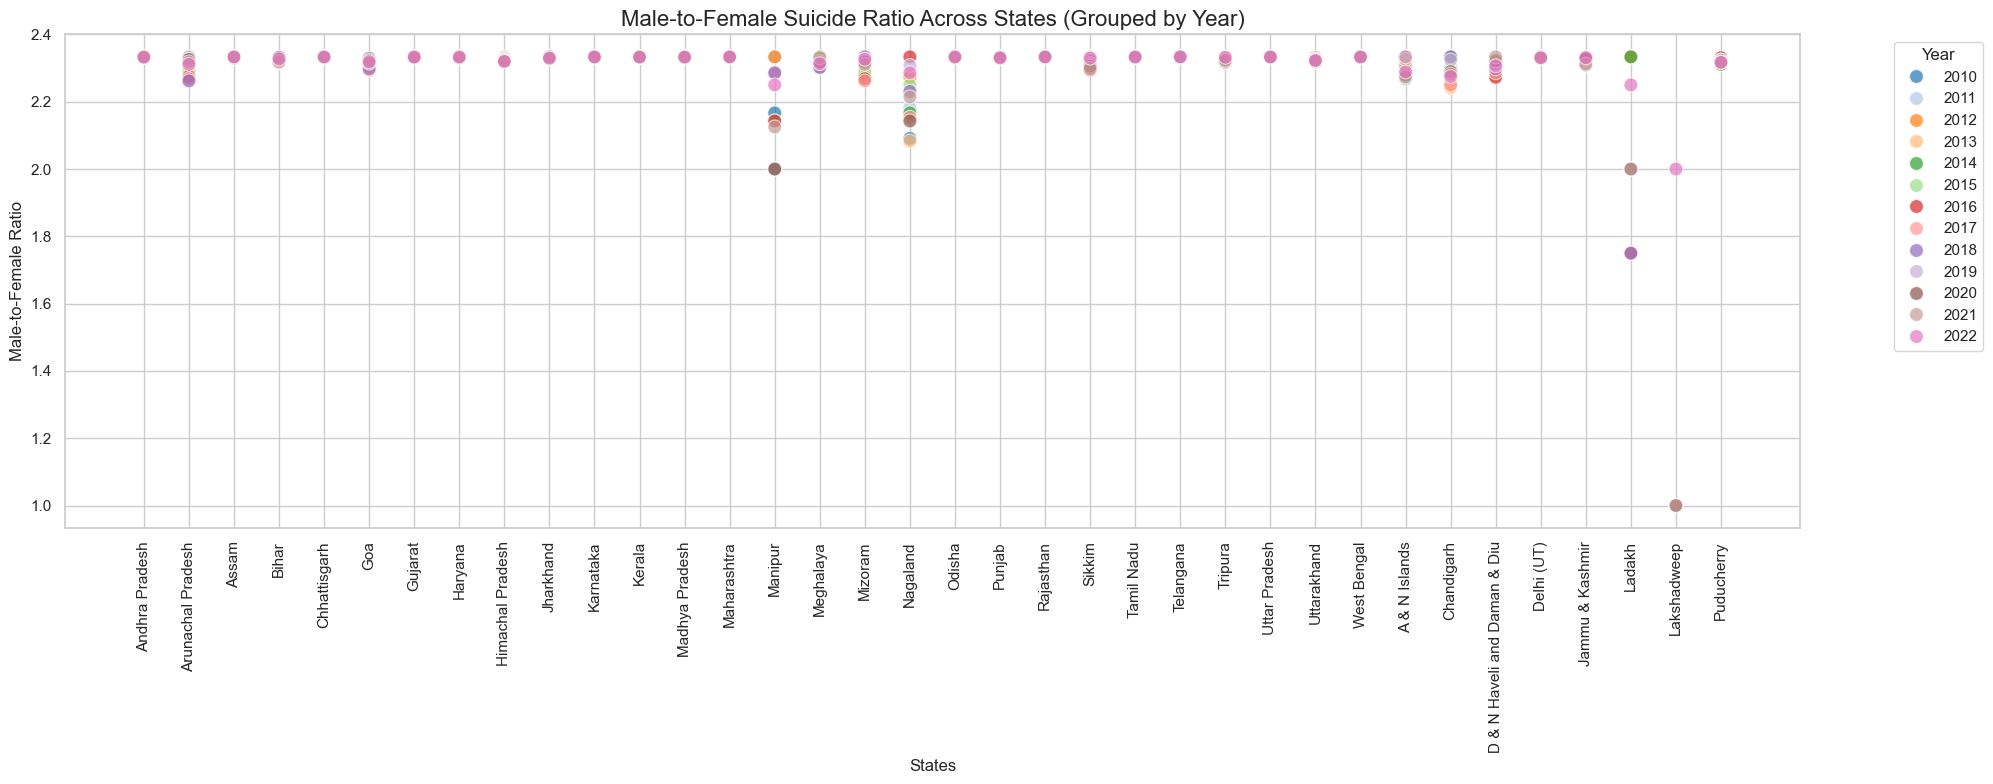

In [49]:
plt.figure(figsize=(20, 8))
sns.set_theme(style="whitegrid")

sns.scatterplot(data=df, x='States', y='Male-to-Female Ratio', hue='Year', palette='tab20', alpha=0.7, s=100)

plt.title('Male-to-Female Suicide Ratio Across States (Grouped by Year)', fontsize=16)
plt.xlabel('States', fontsize=12)
plt.ylabel('Male-to-Female Ratio', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Chi-Square Test

In [50]:
contingency_table = df.groupby('States')[['Male', 'Female']].sum()

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)

if p_value < 0.05:
    print("Result: There is a significant association between States and Gender distribution of suicides.")
else:
    print("Result: No significant association between States and Gender distribution of suicides.")

Chi-Square Statistic: 6.293876487737462
P-Value: 0.999999982186999
Degrees of Freedom: 35
Result: No significant association between States and Gender distribution of suicides.


### Heatmap

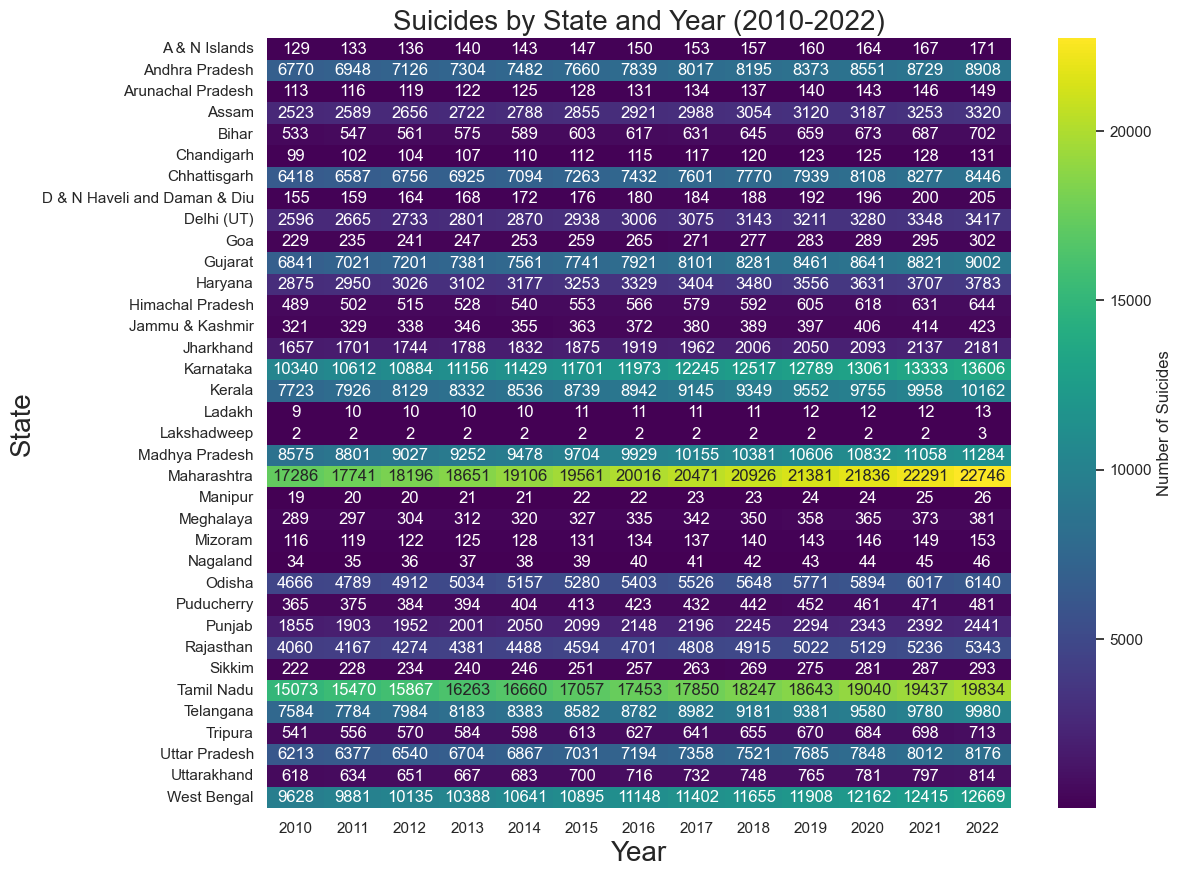

In [51]:
state_year_pivot = df.pivot(index='States', columns='Year', values='No. of suicides')

plt.figure(figsize=(12, 10))
sns.heatmap(state_year_pivot, cmap='viridis', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Suicides'})
plt.title('Suicides by State and Year (2010-2022)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('State',fontsize=20)
plt.show()

- This heatmap reveals patterns across states and years, highlighting any sharp increases in certain regions.
- Regions with **consistently high** suicide numbers are the states of **Maharashtra, West Bengal, Tamil Nadu and Karnataka**.
- By looking at the heatmap, it is clear that the **North-Eastern region** of India has the **least number** of suicide cases.